In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Libraries

In [2]:
import numpy as np
import pandas as pd

# Import Data

In [3]:
# Import data.
loan_data_preprocessed_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

# Explore Data

In [4]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [5]:
# Displays all column names.
loan_data_preprocessed.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_join

In [6]:
loan_data_preprocessed.head()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [7]:
loan_data_preprocessed.tail()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
466280,466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,...,0,0,0,0,0,0,0,0,1,1
466281,466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,...,0,0,0,0,0,0,0,1,0,0
466282,466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,...,0,0,0,0,0,0,0,1,0,1
466283,466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,...,0,0,0,0,0,0,0,0,1,1
466284,466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,...,0,0,0,0,0,0,0,1,0,1


In [8]:
# Here we take only the accounts that were charged-off (written-off).
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [9]:
loan_data_defaults.shape

(43236, 209)

In [10]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [11]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                             0
Unnamed: 0.1                                                           0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                         

# Independent Variables

In [12]:
# We fill the missing values with zeroes.
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)

In [13]:
# We fill the missing values with zeroes.
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

# Dependent Variables

Let start with <b>LGD</b>\
<b>LGD</b> is the proportion of loan that can not be recovered when default occurs.\
$$\mathbf{LGD} = 1 - Recovery_{-}rate = 1 - \frac{\text{recoveries}}{\text{funded amount}}$$

In [14]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

In [15]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

Of course we see that the minimum recovery_rate is 0 but the maximum is greater than 1 (for possible accounting reason).\
<center> We need to set the maximum recovery rate to 1.</center>

In [16]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

In [17]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64


For the <b>EAD</b>,\
the borrower may have defaulted only on a proportion of the funded amount.\
the proportion is called <b>ccf</b> credit conservation factor
$$ \mathbf{EAD = \text{total funded amount} * \text{credit conservation factor}} $$

In our data we will compute the ccf using the total funded amount , the total recovery principal.

In [18]:
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

In [19]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [20]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

# Explore Dependent Variables

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

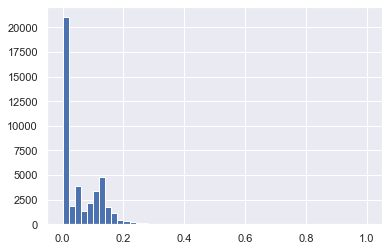

In [22]:
output = plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

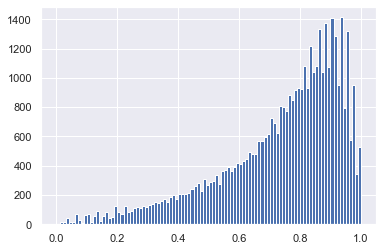

In [23]:
output = plt.hist(loan_data_defaults['CCF'], bins = 100)

In [24]:
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

In [25]:
loan_data_defaults['recovery_rate_0_1'].head()

1     1
8     1
9     1
12    1
14    1
Name: recovery_rate_0_1, dtype: int64

# LGD Model


The most used model is Beta regression , not yet build in in python.\
It would be done in R software with the data.\

We will then use a Logistic Regression combine with multiple linear regression :\
First ,   Is the Recovery Rate strictly greater than 0 ?
>>>> If <b>No</b>,  Estimated Recovery Rate  is set to be  0\
>>>> If <b>yes</b>, we'll use Linear regression to estimate recovery rate

### Splitting Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

### Preparing the Inputs

In [28]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [29]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [30]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [31]:
# Here we keep only the variables we need for the model.
# So we remove the dummy variable reference categories.

lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

In [32]:
# Check for missing values. We check whether the value of each row for each column is missing or not,
# then sum accross columns.

lgd_inputs_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

### Estimating the Model

In [33]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [34]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

In [35]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = lgd_inputs_stage_1_train.columns.values

In [36]:
# Summarise in a table
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values

summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.099871e-03,NaN
1,grade:A,-3.554101e-04,9.967018e-01
2,grade:B,-1.118842e-03,9.871377e-01
3,grade:C,-1.245551e-03,9.851331e-01
4,grade:D,3.237490e-04,9.962848e-01
5,grade:E,3.473946e-04,9.963842e-01
6,grade:F,7.929988e-04,9.928165e-01
7,home_ownership:MORTGAGE,-1.470115e-04,9.954242e-01
8,home_ownership:NONE,7.117268e-06,9.999930e-01
9,home_ownership:OTHER,-9.746874e-06,9.999820e-01


### Testing the Model

In [37]:
# Here we keep only the variables we need for the model.
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [38]:
# Here we remove the dummy variable reference categories.
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

In [39]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [40]:
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 1, 1, 0])

In [41]:
# Calculates the predicted probability values for the dependent variable (targets)
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [42]:
y_hat_test_proba_lgd_stage_1

array([[0.41500699, 0.58499301],
       [0.38352879, 0.61647121],
       [0.60441486, 0.39558514],
       ...,
       [0.49350618, 0.50649382],
       [0.40902462, 0.59097538],
       [0.56660687, 0.43339313]])

In [43]:
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.

y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]

In [44]:
y_hat_test_proba_lgd_stage_1

array([0.58499301, 0.61647121, 0.39558514, ..., 0.50649382, 0.59097538,
       0.43339313])

In [45]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [46]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [47]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)

In [48]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [49]:
# Makes the index of one dataframe equal to the index of another dataframe.
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

In [50]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
178928,1,0.584993
69814,1,0.616471
101396,0,0.395585
463268,1,0.550757
253729,0,0.421088


### Estimating the Аccuracy of the Мodel

In [51]:
tr = 0.5

df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [52]:
# Confusion Matrix
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,1604,2158
1,1069,3817


In [53]:
# Confusion Matrix  : Proportions
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.185476,0.249537
1,0.123612,0.441374


In [54]:
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6268501387604071

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

In [56]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

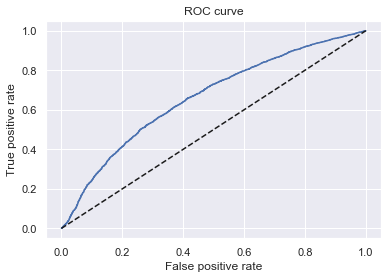

In [57]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [58]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.

AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.6616205683088506

### Saving the Model

It consist on saving the train- logistic model we have.  For our case , the regression logistic model

In [59]:
import pickle

In [60]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))

### Stage 2 – Linear Regression

<center> LGD model stage 2 datasets: how much more than 0 is the recovery rate </center>

In [61]:
# Here we take only rows where the original recovery rate variable is greater than one,
# i.e. where the indicator variable we created is equal to 1.

lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [62]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [65]:
# Here we keep only the variables we need for the model.
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [66]:
# Here we remove the dummy variable reference categories.
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [67]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [69]:
# Summarize the results
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)

summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.406858e-01,NaN
1,grade:A,-6.826892e-02,0.000
2,grade:B,-5.083556e-02,0.000
3,grade:C,-3.748066e-02,0.000
4,grade:D,-2.717310e-02,0.000
5,grade:E,-1.315941e-02,0.002
6,grade:F,-5.260168e-03,0.275
7,home_ownership:MORTGAGE,2.832212e-03,0.061
8,home_ownership:NONE,1.459035e-01,0.000
9,home_ownership:OTHER,-9.475922e-03,0.644


### Stage 2 – Linear Regression Evaluation

In [70]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [71]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)

In [72]:
lgd_inputs_stage_2_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [73]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [74]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [75]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)

In [76]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.307996
0,0.307996,1.000000


<center> We can see that, there is a relative good correlation between actual and predicted values. </center>
Let's plot the residual distribution  between  actual and predicted recovery_rates.

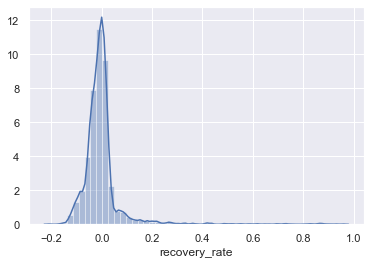

In [77]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

<b> GOOD SIGN </b> : The residuals are quite normally distributed and centered around 0. 

In [78]:
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))

### Combining Stage 1 and Stage 2

<center> For all accounts with predicted recovery rate 0 by the <b>LogisticReg</b> model, we set the estimated recovery to 0 and for all the rest, we use the recovery rate estimated by the <b>LinearReg</b> </center>

In [79]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [80]:
y_hat_test_lgd_stage_2_all

array([0.1193906 , 0.09605635, 0.13367631, ..., 0.12078611, 0.11587422,
       0.15667447])

In [81]:
# Here we combine the predictions of the models from the two stages.
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [82]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.071412
std,0.052944
min,-0.007634
25%,0.000000
50%,0.089072
75%,0.114367
max,0.236973


In [83]:
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [84]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.071414
std,0.052941
min,0.000000
25%,0.000000
50%,0.089072
75%,0.114367
max,0.236973


# EAD Model

<center> We will use a Linear regression model </center>

### Estimation and Interpretation

In [85]:
# EAD model datasets
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

In [86]:
ead_inputs_train.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_join

In [87]:
# Here we keep only the variables we need for the model.
ead_inputs_train = ead_inputs_train[features_all]

In [88]:
# Here we remove the dummy variable reference categories.
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

In [89]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
feature_name = ead_inputs_train.columns.values

In [91]:
# Summarize a table the results
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values

summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.109746e+00,NaN
1,grade:A,-3.030033e-01,0.000000e+00
2,grade:B,-2.364277e-01,0.000000e+00
3,grade:C,-1.720232e-01,0.000000e+00
4,grade:D,-1.198470e-01,0.000000e+00
5,grade:E,-6.768713e-02,0.000000e+00
6,grade:F,-2.045907e-02,4.428795e-03
7,home_ownership:MORTGAGE,-6.343341e-03,2.632464e-03
8,home_ownership:NONE,-5.539064e-03,9.318931e-01
9,home_ownership:OTHER,-2.426052e-03,9.335820e-01


### Model Validation

In [92]:
# Here we keep only the variables we need for the model.
ead_inputs_test = ead_inputs_test[features_all]

In [93]:
# Here we remove the dummy variable reference categories.
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

In [94]:
ead_inputs_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [95]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [96]:
ead_targets_test_temp = ead_targets_test

In [97]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

In [98]:
# We calculate the correlation between actual and predicted values.
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

,CCF,0
CCF,1.000000,0.530654
0,0.530654,1.000000


<center> Here, we have a quite strong correlation between the actual and predicted <b>CCF</b>  </center>
Let's plot the residuals distribution

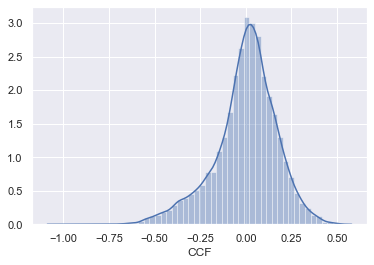

In [99]:
sns.distplot(ead_targets_test - y_hat_test_ead)

The residuals seem to be normally distributed and centered. So the Prediction was actually not so Bad ! 

In [100]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736013
std,0.105194
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.161088


In [101]:
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [102]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.735992
std,0.105127
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.000000


# Expected Loss

###  <center> $EL = PD*LGD*EAD$ </center>

In [103]:
loan_data_preprocessed.head()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [104]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)

In [105]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

In [106]:
# Here we keep only the variables we need for the model.
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [107]:
# Here we remove the dummy variable reference categories.
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)

In [108]:
# We apply the stage 1 LGD model and calculate predicted values.
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [109]:
# We apply the stage 2 LGD model and calculate predicted values.
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [110]:
# We combine the predicted values from the stage 1 predicted model and the stage 2 predicted model
# to calculate the final estimated recovery rate.

loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [111]:
# We set estimated recovery rates that are greater than 1 to 1 and  
# estimated recovery rates that are less than 0 to 0.

loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [112]:
# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [113]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.935608
std           0.058117
min           0.357914
25%           0.882968
50%           0.919543
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [114]:
# We apply the EAD model to calculate estimated credit conversion factor.
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [115]:
# We set estimated CCF that are greater than 1 to 1 and 
# estimated CCF that are less than 0 to 0.

loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])

In [116]:
# We calculate estimated EAD. Estimated EAD equals
# estimated CCF multiplied by funded amount.

loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']

In [117]:
loan_data_preprocessed['EAD'].describe()

count    466285.000000
mean      10814.846760
std        6935.184562
min         190.347372
25%        5495.101413
50%        9208.479591
75%       14692.844549
max       35000.000000
Name: EAD, dtype: float64

In [118]:
loan_data_preprocessed.head()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,1,0,1,1,0.086271,0.086271,0.913729,0.589922,2949.608449
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,1,0,0,1,0.084518,0.084518,0.915482,0.777773,1944.433378
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,1,0,1,1,0.080516,0.080516,0.919484,0.658306,1579.934302
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,1,0,1,1,0.095076,0.095076,0.904924,0.660656,6606.559612
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,1,0,1,1,0.088547,0.088547,0.911453,0.708211,2124.631667


In [119]:
# We import data to apply the PD model.
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')

In [120]:
# We import data to apply the PD model.
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')

In [121]:
# We concatenate the two dataframes along the rows.
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)

In [122]:
loan_data_inputs_pd.shape

(466285, 325)

In [123]:
loan_data_inputs_pd.head()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
0,427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,...,1,0,0,1,0,0,0,0,0,0
1,206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,...,0,0,0,1,0,0,0,0,0,0
2,136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,...,0,0,0,1,0,0,0,0,0,0
3,412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,...,0,0,0,1,0,0,0,0,0,0
4,36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,...,0,1,0,1,0,0,0,0,0,0



<center> The index value will be important to merge the trained PD, LGD, EAD models</center>


In [124]:
# We set the index of the dataframe to the values of a specific column. 
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [125]:
loan_data_inputs_pd.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [126]:
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']

In [127]:
ref_categories_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [128]:
# Here we keep only the variables we need for the model.
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]

In [129]:
# Here we remove the dummy variable reference categories.
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)

In [130]:
loan_data_inputs_pd_temp.shape

(466285, 84)

In [131]:
import pickle

In [132]:
# We import the trained PD model, stored in the 'pd_model.sav' file.

reg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [133]:
# We apply the PD model to caclulate estimated default probabilities.
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

array([0.02957237, 0.09204333, 0.0373372 , ..., 0.02678179, 0.04025139,
       0.0476315 ])

In [134]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

In [135]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
427211    0.029572
206088    0.092043
136020    0.037337
412305    0.204286
36159     0.200192
Name: PD, dtype: float64

In [136]:
loan_data_inputs_pd['PD'].describe()

count    466285.000000
mean          0.109312
std           0.070924
min           0.007302
25%           0.056077
50%           0.093508
75%           0.146566
max           0.638269
Name: PD, dtype: float64

In [137]:
# We concatenate the dataframes where we calculated LGD and EAD
# and the dataframe where we calculated PD along the columns.

loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)

In [138]:
loan_data_preprocessed_new.shape

(466285, 540)

In [139]:
loan_data_preprocessed_new.head()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,PD
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,1,0,1,0,0,0,0,0,0,0.164791
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,1,0,0,0,0,0,0,0.282810
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,1,0,0,0,0,0,0,0.230736
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,1,0,0,0,0,0,0,0.208743
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,1,0,0,0,0,0,0,0.129281


In [140]:
# We calculate Expected Loss. EL = PD * LGD * EAD.

loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

In [141]:
# Shows some descriptive statisics for the values of a column.
loan_data_preprocessed_new['EL'].describe()

count    466285.000000
mean       1097.301334
std        1112.121563
min           9.533662
25%         359.111973
50%         716.967455
75%        1428.073360
max       11921.752736
Name: EL, dtype: float64

In [142]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.164791,0.913729,2949.608449,444.134956
1,2500,2500,0.282810,0.915482,1944.433378,503.428954
2,2400,2400,0.230736,0.919484,1579.934302,335.196074
3,10000,10000,0.208743,0.904924,6606.559612,1247.956591
4,3000,3000,0.129281,0.911453,2124.631667,250.353372


In [143]:
loan_data_preprocessed_new['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,466285.000000,466285.000000
mean,14291.801044,14291.801044
std,8274.371300,8274.371300
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,12000.000000,12000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


In [144]:
# Total Expected Loss for all loans.

loan_data_preprocessed_new['EL'].sum()

511655152.4848584

In [145]:
# Total funded amount for all loans.

loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [146]:
# The Total Expected Loss as a proportion of total funded amount for all loans.
prop = loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()
prop

funded_amnt    0.076778
funded_amnt    0.076778
dtype: float64

<center> So the <b> Expected Loss </b> of this portfolio of <b> loans </b>  represent <span style='color:red'> 7.6 % </span>  of the  portfolio total amount which is almost   <span style='color:red'> $\color{red}{6.665  \text{ billions}.}$</center>

>>> <center><b>The Expected Loss </b> for this entire loan's portfolio is
$\color{red}{\huge{511.655152 \:}millions}$ </center>

# Capital Requirement - IRB approach - Basel II

Since we have compute the PD, EAD, LGD, one can compute the capital requirement using the <font color='red'> regulatory risk-weights function </font> 

$$ Reg_{-}cap = 8\% * RWA = 8\% * K(PD,LGD) * EAD $$
with 
$$ K(PD,LGD) =  LGD* \Big[ \mathcal{N}\Big( \frac{\mathcal{N}^{-1}(PD) +\sqrt{\rho}\mathcal{N}^{-1}(0.999)}{\sqrt{1-\rho}}\Big) -PD\Big]$$
where  $\quad \rho = 0.03\Big(\frac{1 -e^{-35*PD}}{1 -e^{-35}}\Big) + 0.16*\Big(1 - \frac{1 -e^{-35*PD}}{1 -e^{-35}} \Big)$ is the asset correlation coefficient for retail exposures.

In [147]:
const = 1-np.exp(-35)
RHO = 0.03* (1- np.exp(-35*loan_data_preprocessed_new['PD'])/const) \
            + 0.16*(1 - (1- np.exp(-35*loan_data_preprocessed_new['PD'])/const ))
one_minus_rho_square = np.sqrt(1-RHO)
rho_square = np.sqrt(RHO)
term_temp = stat.norm(0,1).ppf(loan_data_preprocessed_new['PD']) + rho_square*stat.norm(0,1).ppf(0.99)
term_temp = term_temp/ one_minus_rho_square
# Add a column for each asset correlation coefficient
loan_data_preprocessed_new['RHO'] = RHO
# Add a column with the regulatory risk-weights function (Basel II)
loan_data_preprocessed_new['K_PD_LGD'] = loan_data_preprocessed_new['LGD']*(stat.norm(0,1).cdf(term_temp) - loan_data_preprocessed_new['PD'])

loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL','RHO','K_PD_LGD']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL,RHO,K_PD_LGD
0,5000,5000,0.164791,0.913729,2949.608449,444.134956,0.030407,0.106712
1,2500,2500,0.282810,0.915482,1944.433378,503.428954,0.030007,0.135543
2,2400,2400,0.230736,0.919484,1579.934302,335.196074,0.030040,0.125802
3,10000,10000,0.208743,0.904924,6606.559612,1247.956591,0.030087,0.118421
4,3000,3000,0.129281,0.911453,2124.631667,250.353372,0.031409,0.094522


In [148]:
loan_data_preprocessed_new['K_PD_LGD'].describe()

count    466285.000000
mean          0.089220
std           0.021673
min           0.025819
25%           0.073280
50%           0.085080
75%           0.102992
max           0.160978
Name: K_PD_LGD, dtype: float64

In [149]:
loan_data_preprocessed_new['Reg_Cap'] = 0.8*loan_data_preprocessed_new['EAD']*loan_data_preprocessed_new['K_PD_LGD']
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL','RHO','K_PD_LGD','Reg_Cap']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL,RHO,K_PD_LGD,Reg_Cap
0,5000,5000,0.164791,0.913729,2949.608449,444.134956,0.030407,0.106712,251.807638
1,2500,2500,0.282810,0.915482,1944.433378,503.428954,0.030007,0.135543,210.843967
2,2400,2400,0.230736,0.919484,1579.934302,335.196074,0.030040,0.125802,159.006887
3,10000,10000,0.208743,0.904924,6606.559612,1247.956591,0.030087,0.118421,625.885918
4,3000,3000,0.129281,0.911453,2124.631667,250.353372,0.031409,0.094522,160.659459


In [150]:
loan_data_preprocessed_new['Reg_Cap'].describe()

count    466285.000000
mean        767.318154
std         538.947943
min          12.615157
25%         368.045478
50%         622.906784
75%        1030.305705
max        4078.370700
Name: Reg_Cap, dtype: float64

In [151]:
loan_data_preprocessed_new['Reg_Cap'].sum()

357788945.4616322

In [152]:
# proportion of the portfolio amount 
loan_data_preprocessed_new['Reg_Cap'].sum()/loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    0.053689
funded_amnt    0.053689
dtype: float64

<h1><center> So almost the regulatory capital is almost $\color{red}{5.3 \%}$ of the portfolio total amount.</h1>
    
>>> <center><b>The regulatory Capital</b> is approximatively $\color{red}{\huge{357.788946} \text{ millions}}$</center>